Google Slide : https://docs.google.com/presentation/d/1pc_nnkZh2ZXxnJpeqwxUaFVXc_TgCj5xgeFbFd0XToM/edit#slide=id.p

 Dataset used : Philadelphia 2012 01 01 to 2019 02 14
Reference : https://ieeexplore.ieee.org/abstract/document/7280812, paper in 2015, cited 20 times
Summary: 
Nevada has weather stations places all over its northern and southern part. The research team gathered one year recent data of 1) temperature, 2) barometric pressure, 3) humidity and 4) wind speed in one hour interval. The research goal is to predict temperature at a given hour by looking at the past twnety four hours of data. 

They constructed input data looking at the past twnety four ours of temperature data only. A feature matrix of size twenty five where first twnety four columns of data corresponds to twenty four consecutive hours of temperature and the final column corresponds to the temeprature at the twnety fifth hour for each entry. They are interested in employing other weather variables in predicting air temperature. (and whether this can improve the model)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

os.environ["KMP_DUPLICATE_LIB_OK"]="True"

Download the data, preprocess the data

In [3]:
def process_FAA_hourly_data(filename):
    path = os.getcwd()
    pathfile = os.path.join(path,"data",filename)
    df_temps = pd.read_csv(pathfile, skiprows=16)
    df_temps = df_temps.iloc[:,:-1]
    df_temps = df_temps.loc[df_temps[df_temps.columns[0]] != df_temps.columns[0]]
    df_temps[df_temps.columns[1]] = df_temps[df_temps.columns[1]].apply(pd.to_numeric, downcast = "integer")
    df_temps[df_temps.columns[2:]] = df_temps[df_temps.columns[2:]].apply(pd.to_numeric, downcast = "float")
    df_temps = df_temps.set_index(pd.DatetimeIndex(df_temps[df_temps.columns[0]]))
    df_temps = df_temps.drop([df_temps.columns[0]], axis=1)
    return df_temps

In [4]:
df_kphl = process_FAA_hourly_data("faa_hourly-KPHL_20120101-20190101.csv")
 

In [5]:
df_kphl_useful = df_kphl.iloc[:,[1,7,8,9]]
df_kphl_useful.head()

,Average Temp (F),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb)
Date/Time (GMT),,,,
2012-01-01 00:00:00,52.000000,54.0,10.4,1016.900024
2012-01-01 01:00:00,51.099998,56.0,10.4,1017.599976
2012-01-01 02:00:00,51.099998,56.0,15.0,1018.299988
2012-01-01 03:00:00,50.000000,58.0,13.8,1019.000000
2012-01-01 04:00:00,48.900002,59.0,8.1,1019.000000


Normalize the data (0 - 1) using MixMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_kphl_useful[[df_kphl_useful.columns[0],df_kphl_useful.columns[1],df_kphl_useful.columns[2],df_kphl_useful.columns[3]]] = scaler.fit_transform(df_kphl_useful[[df_kphl_useful.columns[0],df_kphl_useful.columns[1],df_kphl_useful.columns[2],df_kphl_useful.columns[3]]])

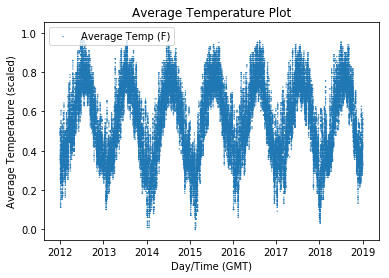

In [9]:
data = df_kphl_useful[df_kphl_useful.columns[0]]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_kphl_useful.index, data, alpha = 0.8, edgecolors='none', s=2)
plt.title("Average Temperature Plot")
plt.xlabel("Day/Time (GMT)")
plt.legend(loc=2)
plt.ylabel("Average Temperature (scaled)")
plt.show()

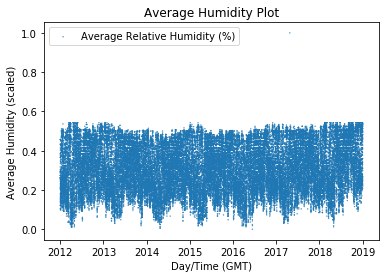

In [10]:
data = df_kphl_useful[df_kphl_useful.columns[1]]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_kphl_useful.index, data, alpha = 0.8, edgecolors='none', s=2)
plt.title("Average Humidity Plot")
plt.xlabel("Day/Time (GMT)")
plt.legend(loc=2)
plt.ylabel("Average Humidity (scaled)")
plt.show()

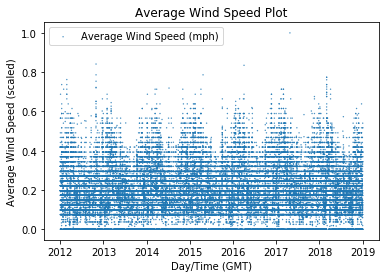

In [11]:
data = df_kphl_useful[df_kphl_useful.columns[2]]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_kphl_useful.index, data, alpha = 0.8, edgecolors='none', s=2)
plt.title("Average Wind Speed Plot")
plt.xlabel("Day/Time (GMT)")
plt.legend(loc=2)
plt.ylabel("Average Wind Speed (scaled)")
plt.show()

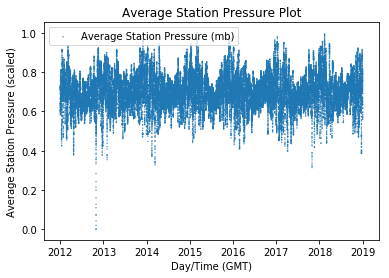

In [12]:
data = df_kphl_useful[df_kphl_useful.columns[3]]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_kphl_useful.index, data, alpha = 0.8, edgecolors='none', s=2)
plt.title("Average Station Pressure Plot")
plt.xlabel("Day/Time (GMT)")
plt.legend(loc=2)
plt.ylabel("Average Station Pressure (scaled)")
plt.show()

Make timeindex and reindex

In [14]:
start = df_kphl_useful.index[0]
end = df_kphl_useful.index[-1]
idx = pd.date_range(start, end, freq='H')

df_kphl_useful = df_kphl_useful.reindex(idx, fill_value = np.nan)

print("Start day is {}".format(df_kphl_useful.index[0]))
print("End day is {}".format(df_kphl_useful.index[-1]))

Start day is 2012-01-01 00:00:00
End day is 2019-01-01 23:00:00
